## Author - Ritwik Ganguly

### Importing Necessary Packages


In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r"C:\Users\RITWIK GANGULY\Downloads\Data Analysis")

In [48]:
df = pd.read_csv("dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


##### Detection of Null Entries

In [50]:
df.isnull().sum()

input     1
output    1
dtype: int64

- here we can see that the total null rows is 1 and total null column is 1

##### Remove the duplicate entries

In [51]:
df = df.dropna()

In [52]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [59]:
dup = df[df.duplicated()]
dup.shape[0]

0

In [58]:
df.drop_duplicates(inplace=True)

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_18276/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [60]:
df.describe()

,input,output
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


- from the description of the dataset we can see that the mean of input is 1.159933 a positive value and the mean of output is -34.088017 a negative value

##### Scatterplot  of the dataitems

In [61]:
x = df["input"]
y = df["output"]

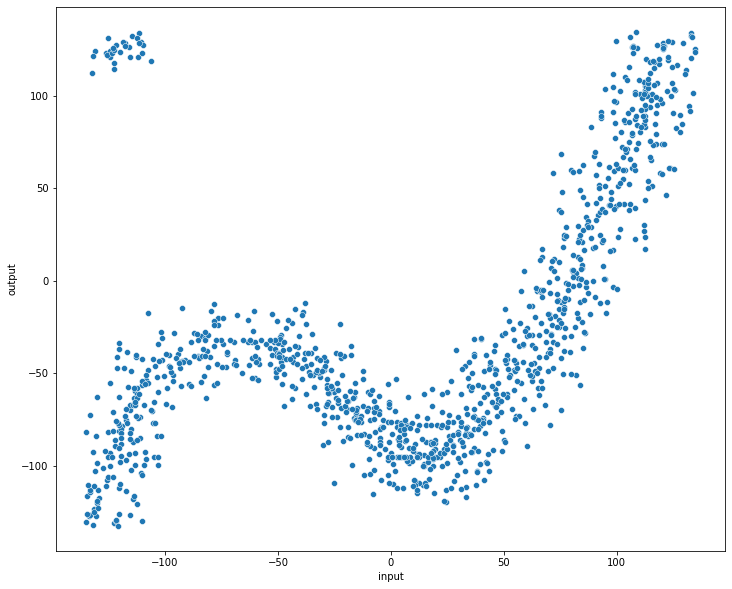

In [62]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x = x, y = y, data=df)
plt.show()

- from the scatterplot we can see the distrinution of the points through out the range

In [63]:
data1 = df[(df.input < -100) & (df.output > 100)]

In [64]:
data1.head()

,input,output
1072,-125.366669,131.000000
1073,-114.508654,132.424802
1076,-126.029114,123.060597
1077,-106.093619,118.532422
1079,-116.197531,126.190248


In [65]:
data1.shape

(29, 2)

- here we can see that the inputs which are less than 100 and for those input if the output is more than 100, that number of samples are 29
- we can visualize the same from the scatterplot given above

In [66]:
data2 = df[(df.input > -50) & (df.input < 50) & (df.output > 0)]

In [67]:
data2.shape

(0, 2)

- here we can see that the inputs which are in the range (-50, 50), and for those inputs outputs of more than 0 is 0
- we can visualize the same from the scatterplot given above

In [68]:
data3 = df[(df.input > 50)]

In [69]:
data3

,input,output
255,55.444497,-47.439608
256,55.475282,-72.980434
257,50.105981,-85.900014
267,58.915790,-63.866634
268,63.249836,-44.392207
...,...,...
1066,122.831827,129.434291
1067,134.605775,123.619680
1069,115.862302,118.564590
1070,117.366199,99.544820


- in this section(i.e. data3) we can see there exist more sample points(397)

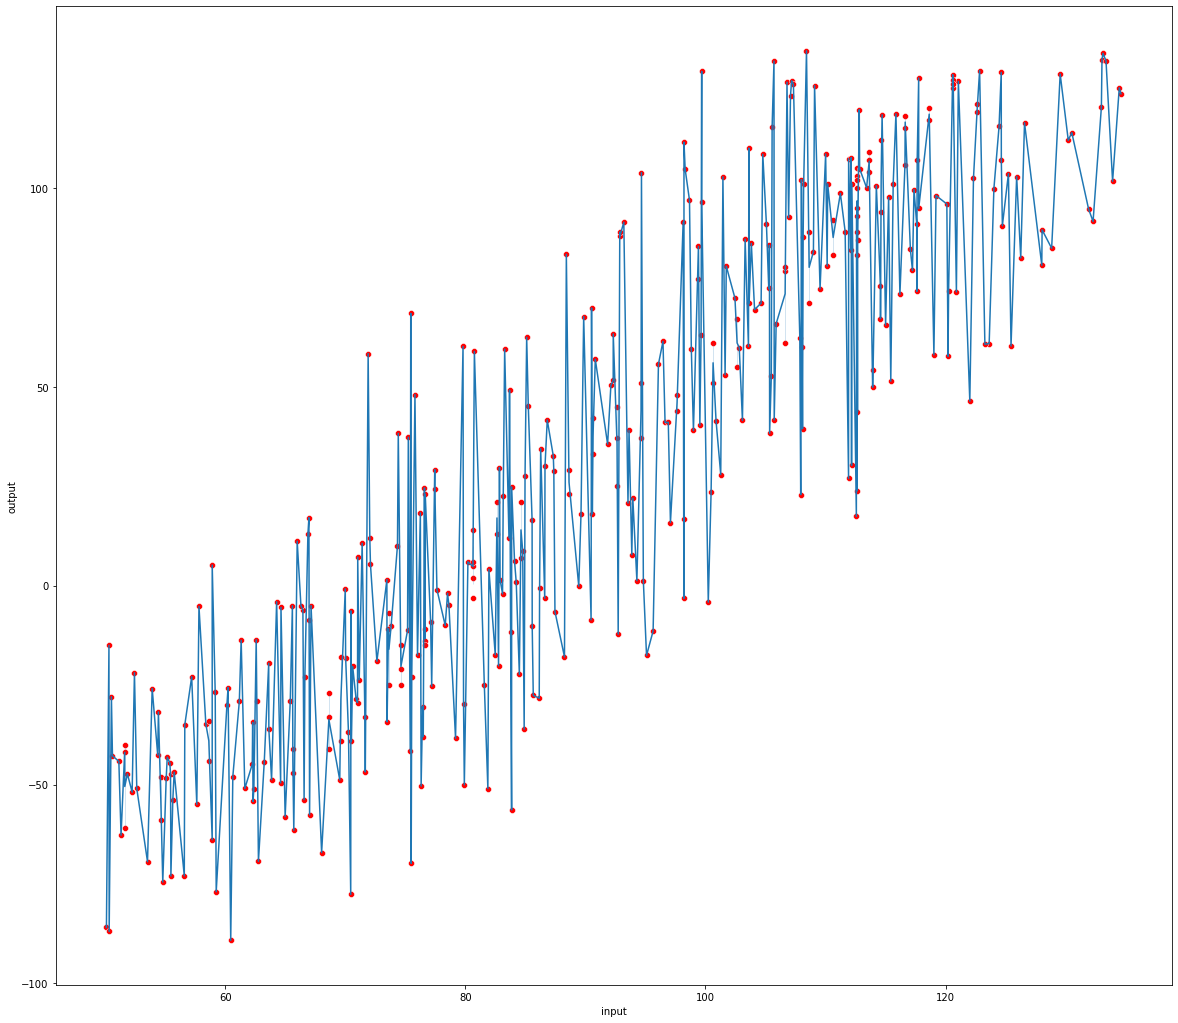

In [70]:
plt.figure(figsize=(20, 18))
sns.scatterplot(x = data3["input"], y = data3["output"], data=data3, color = "red")
sns.lineplot(x=data3["input"], y=data3["output"], data = data3)
plt.show()

- Here we can see that the line plot is increasing, that depicts that for increasing in input the output is also increasing

### machine Learning Model

##### Linear Regression model

In [73]:
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

In [75]:
lm = LinearRegression()
lm

LinearRegression()

At initial we are taking the 100% of dependent(output) and independent(input) variable for training purpose and for later point of time the same variable will be used for testing and for the accuracy chacking of the ML model

In [76]:
X = df[["input"]]
Y = df["output"]

In [77]:
lm.fit(X, Y)

LinearRegression()

In [78]:
yhat = lm.predict(X)

In [79]:
yhat[0:5]

array([-84.68355161, -84.1540431 , -90.01536267, -83.74879674,
       -87.8162125 ])

In [80]:
Y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [81]:
lm.intercept_

-30.937563632729766

In [82]:
lm.coef_

array([0.43788248])

we will get the final linear model with the structure......

$$
Yhat = a + b  X
$$


Putting the values we get....

<b>output</b> = -30.93756 - 0.437883 x <b>input</b>

In [90]:
from sklearn.metrics import r2_score

In [91]:
print("R2-score: %.2f" % r2_score(Y , yhat))

R2-score: 0.25


- we can see the r2_score is too less, so the model is not so accurate

Now I will be doing the splitting of the dataset and train one portion/segment/part of the dataset for training and another portion for testing the model

In [100]:
from sklearn.model_selection import train_test_split as tr
import sklearn.metrics as met

In [130]:
X_train, X_test, y_train, y_test = tr(X, Y, test_size=0.2, random_state=3)

In [131]:
X_train.shape

(872, 1)

In [132]:
y_train.shape

(872,)

In [133]:
lm.fit(X_train, y_train)

LinearRegression()

In [134]:
pred = lm.predict(X_test)

In [135]:
pred[0:10]

array([ -3.38472938,  13.60441231, -30.14359393, -55.89741109,
       -64.16981757, -34.05357256,   0.7764122 ,  10.93092084,
       -51.53657037, -35.27790827])

In [136]:
y_test.head(10)

545   -29.114914
422    41.366243
651   -95.000000
99    -33.249782
781   -46.332085
685   -70.137383
288   -28.510223
511    51.000000
122   -37.000000
671   -83.000000
Name: output, dtype: float64

In [137]:
r2_score(y_test, pred)

0.31112895520269734

- its quite accurate 

### outlier detection

In [143]:
df.describe()

,input,output
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


##### outlier function

In [ ]:
def outlier(mean,std_dev,num_samples):
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores
input_data = outlier(8, 79, 1090)

##### for input data

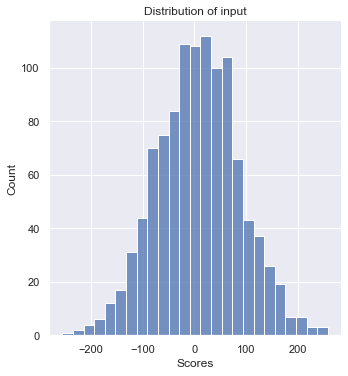

In [147]:
sns.displot(data=input_data).set(title="Distribution of input", xlabel="Scores")

###### for output data

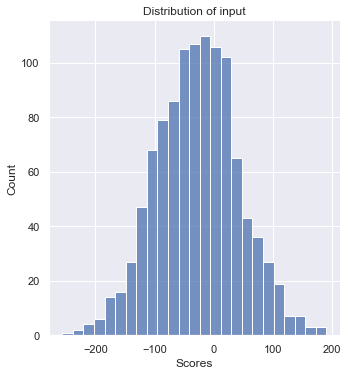

In [149]:
output_data = outlier(-27.38, 68.37, 1090)
sns.displot(data=output_data).set(title="Distribution of input", xlabel="Scores")

In [151]:
df_output = pd.DataFrame(output_data,columns=['score'])
df_output

,score
0,61.0
1,-48.0
2,15.0
3,-0.0
4,-12.0
...,...
1085,-4.0
1086,-46.0
1087,80.0
1088,-55.0


In [152]:
df_output.mean()

score   -27.555046
dtype: float64

In [153]:
df_output.std()

score    69.674313
dtype: float64

In [154]:
lower_limit = df_output.mean() - 3*df_output.std()
upper_limit = df_output.mean() + 3*df_output.std()
print(lower_limit)
print(upper_limit)

score   -236.577983
dtype: float64
score    181.467892
dtype: float64


#### Statistical Model of the dataset

In [161]:
ip = df["input"]
op = df["output"]

In [164]:
mod = sm.add_constant(ip)
results = sm.OLS(op, ip).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 output   R-squared (uncentered):                   0.183
Model:                            OLS   Adj. R-squared (uncentered):              0.182
Method:                 Least Squares   F-statistic:                              243.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):                    9.64e-50
Time:                        16:04:23   Log-Likelihood:                         -6122.4
No. Observations:                1090   AIC:                                  1.225e+04
Df Residuals:                    1089   BIC:                                  1.225e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
input          0.3978      0.025     15.613      0.000       0.348       0.448
==============================================================================
Omnibus:                      210.096   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.275
Skew:                           1.149   Prob(JB):                     3.99e-86
Kurtosis:                       4.838   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Thank you 😊😊😊